<a href="https://colab.research.google.com/github/student-ganesh/ganesh-demo/blob/main/CODSOFT_PRO3_ADVERTISING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


LOAD DATASET

In [4]:
from google.colab import files
uploaded = files.upload()

# Load your dataset
df = pd.read_csv('advertising.csv')
df.head()


Saving advertising.csv to advertising (1).csv


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


from matplotlib import pyplot as plt
_df_0['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

DATA PREPROCESSING

In [7]:
# Convert categorical columns into dummy variables
df = pd.get_dummies(df, drop_first=True)

# Handle missing values
df.fillna(df.median(), inplace=True)

# Show the first few rows of the processed data
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


DEFINE A FEATURE AND TARGET

In [9]:
print(df.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [11]:
# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper', 'Sales']]  # Adjust column names as per your dataset
y = df['Sales']  # Assuming 'sales' is the target variable


spliting


In [12]:
# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (160, 4), Test data shape: (40, 4)


FEATURE SCALING

In [13]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


LINEAR REGRESSION

In [14]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train_scaled, y_train)

#Predictions on the test data
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Model:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Linear Regression Model:
Mean Squared Error: 5.738963085482861e-30
R-squared: 1.0


VIDUALIZATION

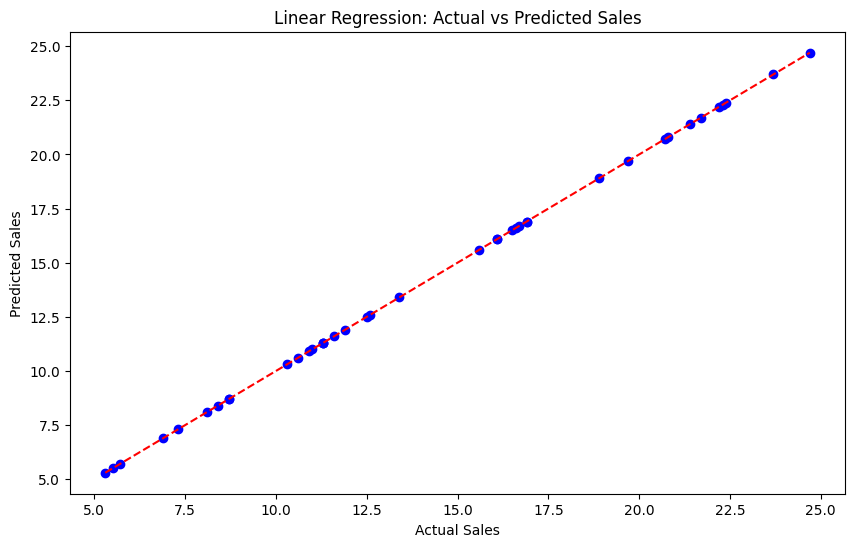

In [15]:
# Plot the actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()
